# Guided Capstone Step 5. Modeling

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone. This gives you the opportunity to practice the code you wrote to solve the questions in step 4. 

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.listdir()

['GuidedCapstoneStep3-AnswerKey.ipynb',
 'GuidedCapstoneStep4-AnswerKey.ipynb',
 'Untitled.ipynb',
 'GuidedCapstoneStep5-AnswerKey.ipynb',
 'GuidedCapstoneStep2-AnswerKey.ipynb',
 'AnnotatedBoxplot.png',
 'GuidedCapstoneStep5.ipynb',
 'GuidedCapstoneStep3.ipynb',
 '.ipynb_checkpoints',
 'GuidedCapstoneStep6.ipynb',
 'GuidedCapstoneStep4.ipynb',
 'GuidedCapstoneStep6-AnswerKey.ipynb',
 'GuidedCapstoneStep2.ipynb']

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [3]:
path="/Users/justin/Desktop/GuidedCapstone-master-2/data/data"
os.chdir(path)

In [4]:
file="step3_output.csv"
df=pd.read_csv(file)
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [5]:
#check shape 
print(df.shape)
print('\n')
print(df.isnull().sum())

(330, 26)


Name                 0
state                0
summit_elev          0
vertical_drop        0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
clusters             0
dtype: int64


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

In [6]:
#Lets Change the way we encode here and scale so we can prevent data leakage

#Introduce Column Transformer here
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

ohe = OneHotEncoder(handle_unknown='ignore') #if test set has less features 
scaler = preprocessing.StandardScaler()
#drop the recommended columns 
df2 = df.drop(['Name','AdultWeekend'], axis=1)
#clusters shouldn't be scaled as well.  
ct = make_column_transformer(
    (ohe, ['state', 'clusters']), #encode state 
    (scaler, ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac']), #scale
    remainder='passthrough') #passthrough

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

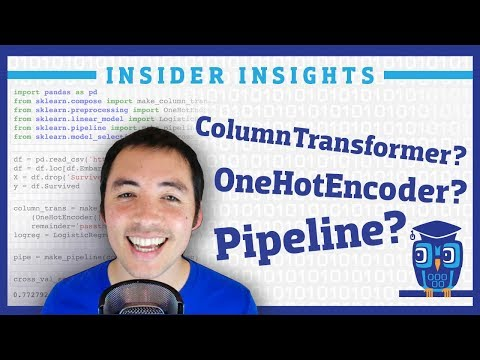

In [153]:
#Maybe put a video tutorial here 
from IPython.display import YouTubeVideo
YouTubeVideo('irHhDMbw3xo')

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [145]:
from sklearn.model_selection import train_test_split
#Set X and Y
X = df2
y = df.AdultWeekend

y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model on your training dataset.</font>**

#### Model 1

In [146]:
#all first model set
#Should really use column transformer here like this 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()

pipe = make_pipeline(ct, lm)

In [147]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['state', 'clusters']),
                                                 ('standardscaler',
                                                  StandardScaler(copy=Tr...
                                            

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

In [148]:
y_pred = pipe.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed.

In [149]:
print(explained_variance_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.8619651492925915


6.538531616384894

**<font color='teal'> Print the intercept value from the linear model. </font>**

In [150]:
pipe.named_steps['linearregression'].intercept_

-5978791383553.316

In [48]:
X_ct = ct.transform(X)

In [52]:
X_ct = pd.DataFrame(X_ct)

In [46]:
pipe.named_steps['linearregression'].coef_.shape

(60,)

In [103]:
#Matching Column names to a column Transformer 
l = pipe.named_steps['columntransformer'].transformers_[0][1].categories_
l[1]
column_names = ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac'] + list(l[0]) + list(l[1])
len(column_names)

60

 **<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for `AdultWeekend` resulting value. Also, because we took the time to scale our x values in the training data we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [104]:
coeff_df = pd.DataFrame(abs(pipe.named_steps['linearregression'].coef_)
                        ,column_names, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
NightSkiing_ac,5.978791e+12
Idaho,5.978791e+12
Maryland,5.978791e+12
surface,5.978791e+12
total_chairs,5.978791e+12
Runs,5.978791e+12
yearsOpen,5.978791e+12
Iowa,5.978791e+12
Colorado,5.978791e+12
Illinois,5.978791e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

#### Model 2

In [106]:
#Best to break down these steps
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [108]:
X2=df.drop(['AdultWeekend','Name','state'], axis=1)
y=df.AdultWeekend
y=y.ravel()

In [109]:
#Create new column transformer to just scale everything 
ct2 = make_column_transformer(
    (ohe, ['clusters']), #encode clusters still 
    (scaler, ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac']), #scale
    remainder='passthrough') #passthrough

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=1)

In [112]:
lm = linear_model.LinearRegression()
pipe2 = make_pipeline(ct2, lm)
pipe2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['clusters']),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                     

In [113]:
y_pred2 = pipe2.predict(X_test)
print(explained_variance_score(y_test, y_pred2))
mean_absolute_error(y_test, y_pred2)

0.9317785168399555


5.211950847701487

In [121]:
pipe2.named_steps['linearregression'].intercept_

63.36452342404056

In [117]:
l2 = pipe2.named_steps['columntransformer'].transformers_[0][1].categories_
column_names2 = ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac'] + list(l2[0])

In [120]:
coeff_df = pd.DataFrame(abs(pipe2.named_steps['linearregression'].coef_), column_names2, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
0,18.833490
fastSixes,1.863121
trams,1.681521
SkiableTerrain_ac,1.565536
surface,1.460822
NightSkiing_ac,1.402364
total_chairs,1.358201
vertical_drop,1.323196
TerrainParks,1.215341
AdultWeekday,0.957502


**<font color='teal'> When reviewing our new model coefficients we see `summit_elev` is now in the number two spot, this also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [135]:
#base_elevation was already dropped 
X3=df.drop(['Name','AdultWeekend','state','summit_elev'], axis=1)
y=df.AdultWeekend
y=y.ravel()


In [136]:
#Create new column transformer to just scale everything 
ct3 = make_column_transformer(
    (ohe, ['clusters']), #encode clusters still 
    (scaler, ['vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac']), #scale
    remainder='passthrough') #passthrough

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=1)

In [138]:
#Fit the model
lm = linear_model.LinearRegression()
pipe3 = make_pipeline(ct3, lm)
pipe3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['clusters']),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                     

In [139]:
y_pred3 = pipe3.predict(X_test)
print(explained_variance_score(y_test, y_pred3))
mean_absolute_error(y_test, y_pred3)

0.9317354554625729


5.217986302145228

In [140]:
pipe3.named_steps['linearregression'].intercept_

63.24982487088566

In [141]:
pipe3.named_steps['linearregression'].coef_.shape

(24,)

In [142]:
l3 = pipe3.named_steps['columntransformer'].transformers_[0][1].categories_
column_names3 = ['vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac'] + list(l3[0])
len(column_names3)

24

In [143]:
coeff_df = pd.DataFrame(abs(pipe3.named_steps['linearregression'].coef_), 
                        column_names3, columns=['Coefficient'])  
coeff_df.sort_values(by=['Coefficient'],ascending=False).head(10)

,Coefficient
0,18.823408
fastSixes,1.836260
fastEight,1.708401
trams,1.581908
SkiableTerrain_ac,1.579515
surface,1.465290
NightSkiing_ac,1.410997
total_chairs,1.354112
TerrainParks,1.221711
AdultWeekday,0.935621


In [151]:
modelCompare = pd.DataFrame({'Model':['Model 1', 'Model 2', 'Model 3'], 
                             'Explained Variance': [0.8619651492925915, 0.9317785168399555, 0.9317354554625729],
                             'Mean Absolute Error': [6.538531616384894, 5.211950847701487, 5.217986302145228],
                             'Features Dropped': ['-', 'states', 'states, summit_elev, imaginary base_elev feature']})

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell and you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0. |  |-|
| Model 2. | 0.| |'state'|
| Model 3. | 0. | |'state','summit_elev','base_elev'|

Model Selection:

In [152]:
modelCompare

,Model,Explained Variance,Mean Absolute Error,Features Dropped
0,Model 1,0.861965,6.538532,-
1,Model 2,0.931779,5.211951,states
2,Model 3,0.931735,5.217986,"states, summit_elev, imaginary base_elev feature"
